# Experiment with Bumbs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot inline
%matplotlib inline

# Add the proper path
import sys
sys.path.append("../")

# Local libraries
from signals.aux_functions import bump
from inputs.sensors import Sensor, PerceptualSpace
from inputs.lag_structure import LagStructure



In [2]:
Tmax = 1000
dt = 0.1
time = np.arange(0, Tmax, dt)

### Parameters of the bumbs

In [3]:
center1 = 300.0
center2 = 700.0
offset = 100.0
Max = 100.0

signal1 = bump(time, offset, center1, Max)
signal2 = bump(time, offset, center2, Max)


signal1 += signal1 + np.random.rand(signal1.size)
signal2 += signal2 + np.random.rand(signal2.size)

### We plot the bumps

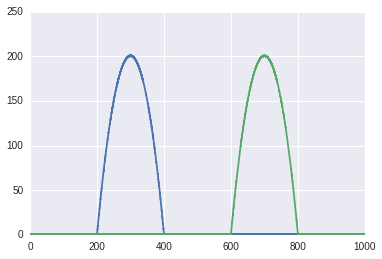

In [4]:
plt.plot(time, signal1)
plt.hold(True)
plt.plot(time, signal2)

## Nexa Analysis


### First we define the PerceptualSpace

In [5]:
lag_times = np.linspace(0, 600, 4) # Go two times the period
window_size = 2 * offset
Nwindowsize = int(window_size / dt) 
weights = None
lag_structure = LagStructure(lag_times=lag_times, weights=weights, window_size=window_size)
sensor1 = Sensor(signal1, dt, lag_structure)
sensor2 = Sensor(signal2, dt, lag_structure)
sensors = [sensor1, sensor2]
perceptual_space = PerceptualSpace(sensors, lag_first=True)

### Now we Start Nexa

In [6]:
from nexa.nexa import Nexa

Nspatial_clusters = 2  # Number of spatial clusters
Ntime_clusters = 4  # Number of time clusters
Nembedding = 2  # Dimension of the embedding space

# Now the Nexa object
nexa_object = Nexa(perceptual_space, Nspatial_clusters,
                   Ntime_clusters, Nembedding)

# Make all the calculations

/home/heberto/miniconda/envs/nexa/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


### Visualization

In [7]:
# Visualization libraries
from visualization.sensor_clustering import visualize_cluster_matrix
from visualization.sensors import visualize_SLM
from visualization.sensors import visualize_STDM_seaborn

#### Visualize SLM

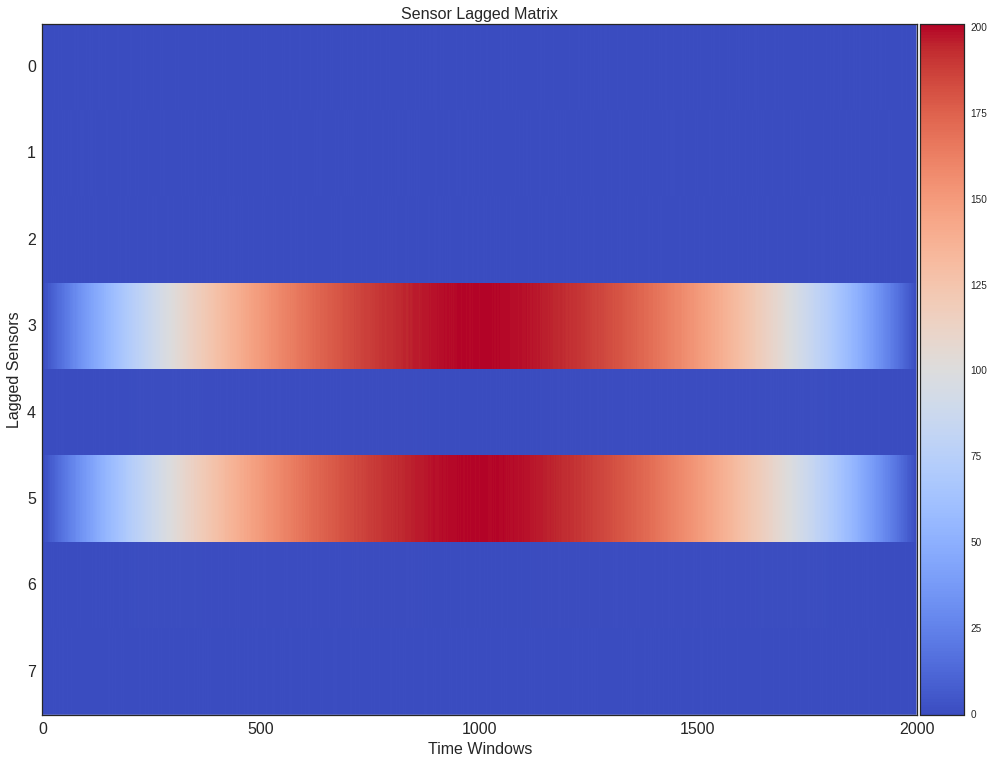

In [8]:
%matplotlib inline
fig = visualize_SLM(nexa_object)
plt.show(fig)

#### Spatio Temporal Distance Matrix

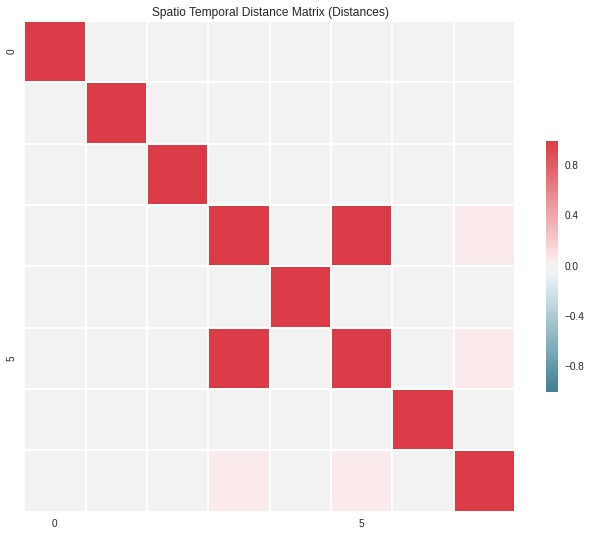

In [9]:
#  fig = visualize_STDM(nexa_object)
nexa_object.calculate_distance_matrix()
fig = visualize_STDM_seaborn(nexa_object)
plt.show(fig)

### We check how the embedding looks on 2 dimensions.

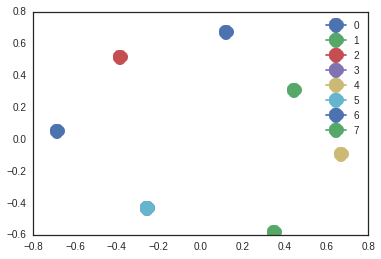

In [10]:
nexa_object.Nembedding = 2
nexa_object.calculate_embedding()
embed = nexa_object.embedding


for i in range(embed.shape[0]):
    plt.plot(embed[i, 0], embed[i, 1], label=str(i), marker='o',
             markersize=15)
    plt.hold(True)
    
plt.legend()

#### Sensor Clustering

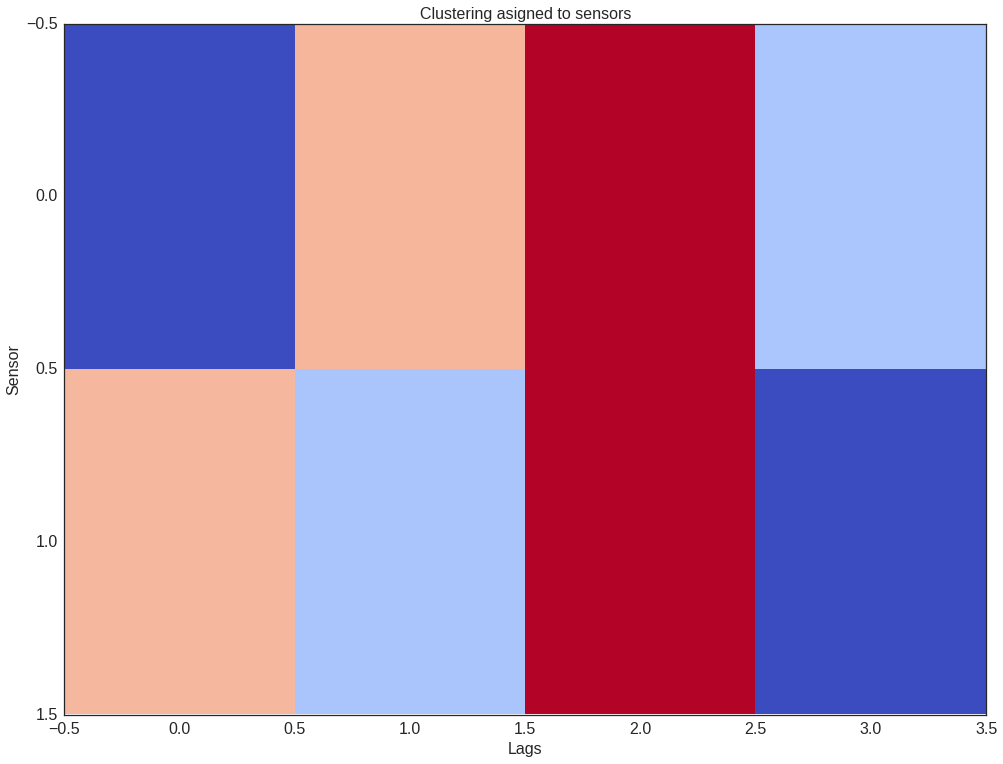

In [11]:
%matplotlib inline
nexa_object.Nspatial_clusters = 4
nexa_object.calculate_spatial_clustering()
fig = visualize_cluster_matrix(nexa_object)